# Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Loading Data

In [24]:
os.chdir('C:\\Users\\Avita\\OneDrive\\Desktop\\Capstone Project\\credit card fraud detection dataset')

In [25]:
cust_df=pd.read_csv('fraud test.csv')

In [26]:
cust_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# Checking Data

In [27]:
cust_df.shape

(555719, 23)

In [28]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [29]:
cust_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
# trans_date_trans_time ,dob should be in datetime datatype

In [30]:
cust_df.describe().T.drop(columns=['count','mean','std'])

,min,25%,50%,75%,max
Unnamed: 0,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,6.041621e+10,1.800430e+14,3.521420e+15,4.635330e+15,4.992350e+18
amt,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


# Data Cleaning

In [75]:
cust_df['trans_date_trans_time']=pd.to_datetime(cust_df['trans_date_trans_time'],format='%d/%m/%Y %H:%M')

In [78]:
cust_df['dob']=pd.to_datetime(cust_df['dob'],format='%d/%m/%Y')

In [79]:
cust_df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [31]:
cust_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [32]:
# No null value present 

In [33]:
cust_df.duplicated().sum()

0

In [34]:
# No duplicates found

In [36]:
cust_df.drop(columns=['Unnamed: 0'], inplace=True)

In [39]:
cust_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


### Unnamed: 0 column was dropped as it doesn’t provide any useful information for modeling or analysis

# EDA and Visualization

In [40]:
cust_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [41]:
# Histogram - to show the distibution of single continuous column

In [48]:
num_col=cust_df[['amt','city_pop','lat','long','merch_lat','merch_long']]

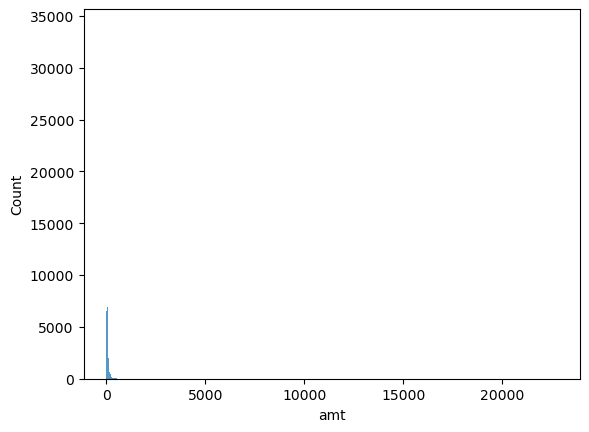

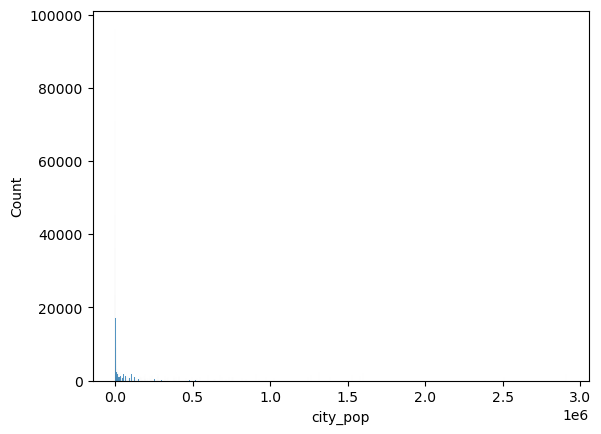

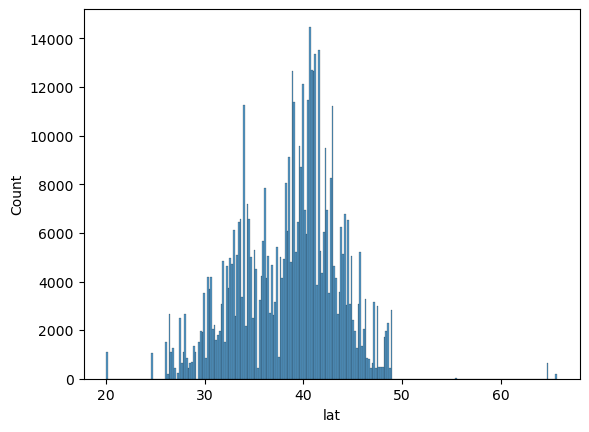

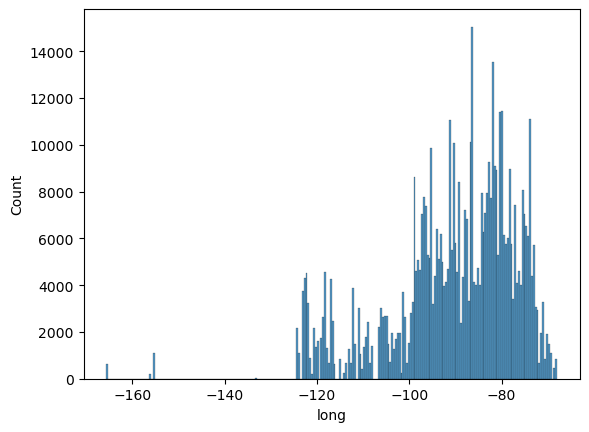

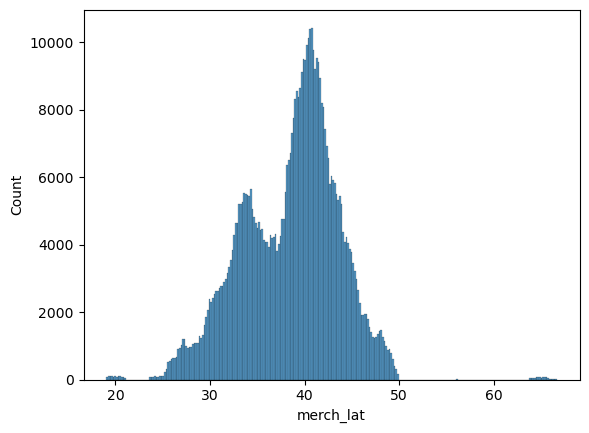

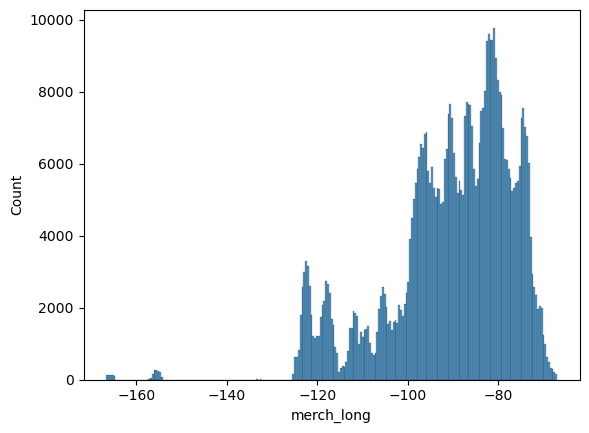

In [49]:
for i in num_col:
    sns.histplot(data=num_col,x=i)
    plt.show()

### Observation
### The lat and merch_lat (latitude) features show a fairly central distribution, indicating transactions and merchant locations are spread evenly across north-south regions. 
### The long and merch_long (longitude) are right-skewed, with most values concentrated between -100 and -80, suggesting a higher density of transactions and merchants in the eastern part of the United States.

In [50]:
# Boxplot- to check mean median and outliers of numeric column

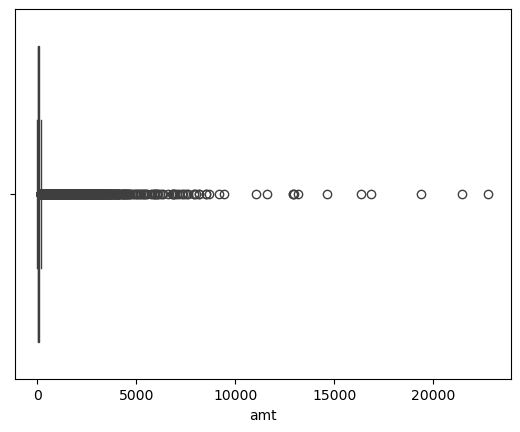

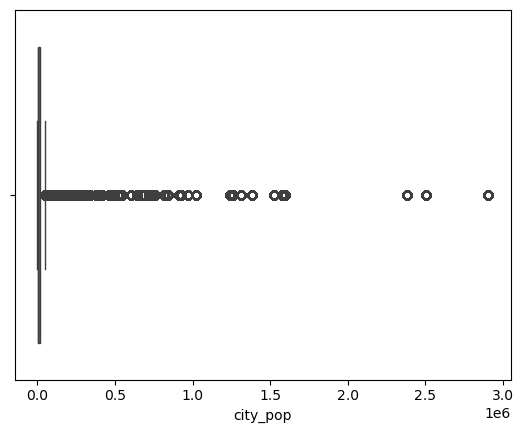

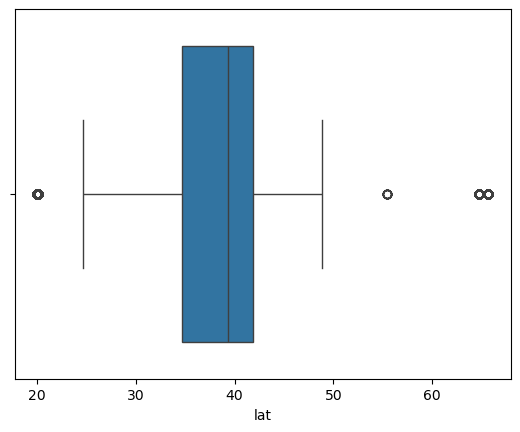

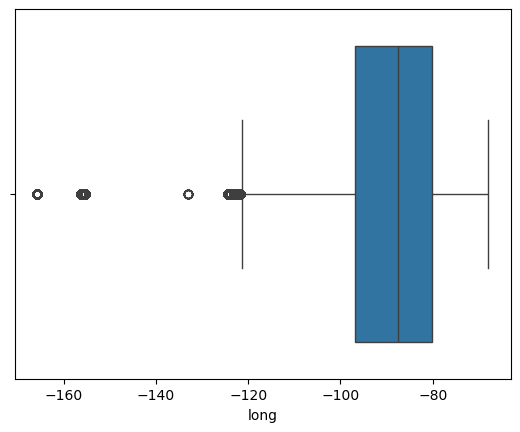

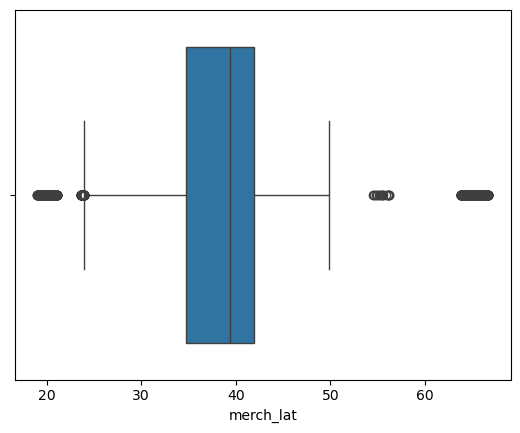

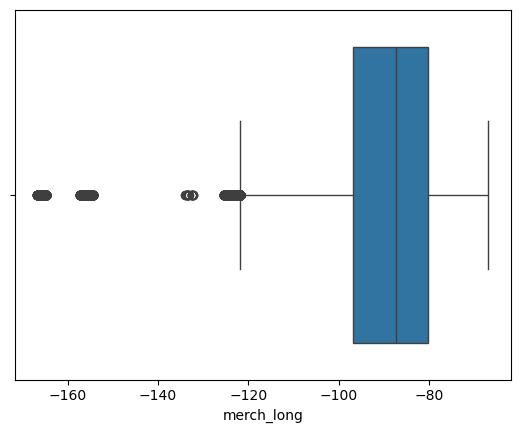

In [51]:
for i in num_col:
    sns.boxplot(data=num_col,x=i)
    plt.show()

## Obsrvation
### Boxplots of numerical features such as amt, city_pop, and geolocation variables show several outliers. However, in a fraud detection context, these outliers may represent critical anomalies or valid rare events. Hence, they are retained to preserve potential fraud-related signals.

In [53]:
# Heatmap- to show how two categorical variable are related

In [54]:
num_corr=num_col.corr()

<Axes: >

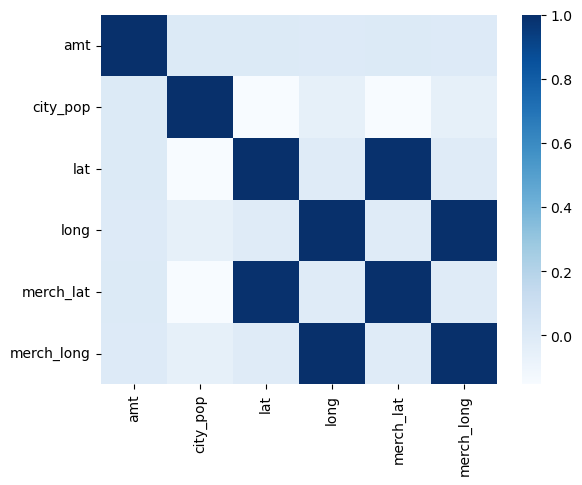

In [55]:
sns.heatmap(data=num_corr,cmap='Blues')

### Obervation
### The correlation heatmap shows very weak relationships among all numeric features
### There is no concern of multicollinearity in the data

In [56]:
# Barplot/Countplot- to show the occurance of category data

In [57]:
cust_df.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [61]:
cat_col=cust_df[['category','gender','state','is_fraud']]

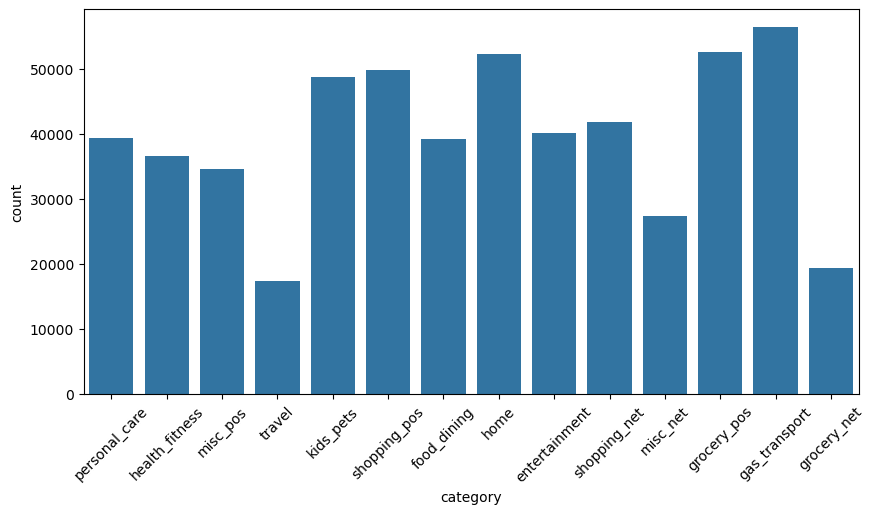

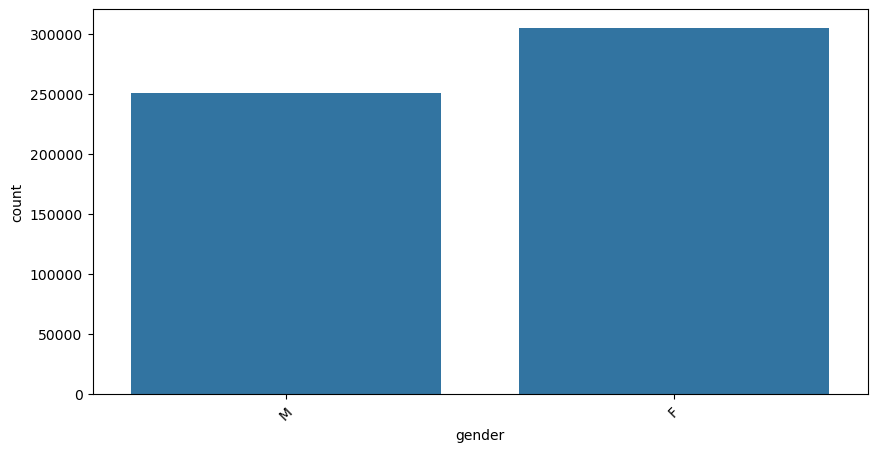

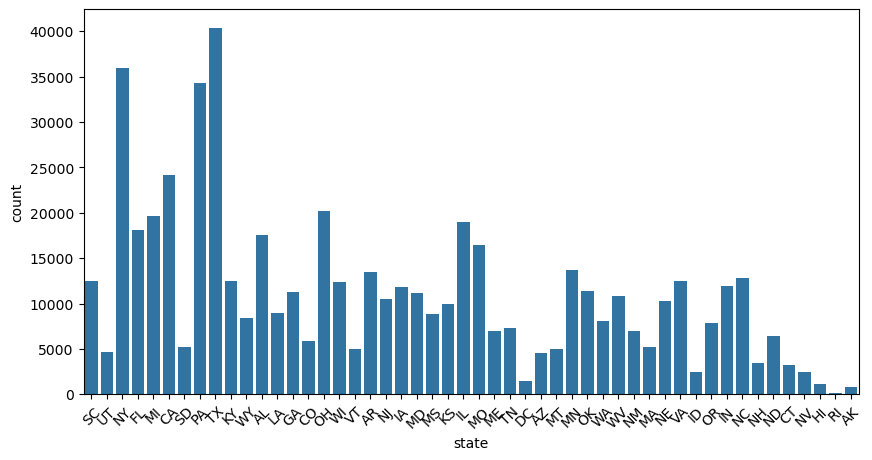

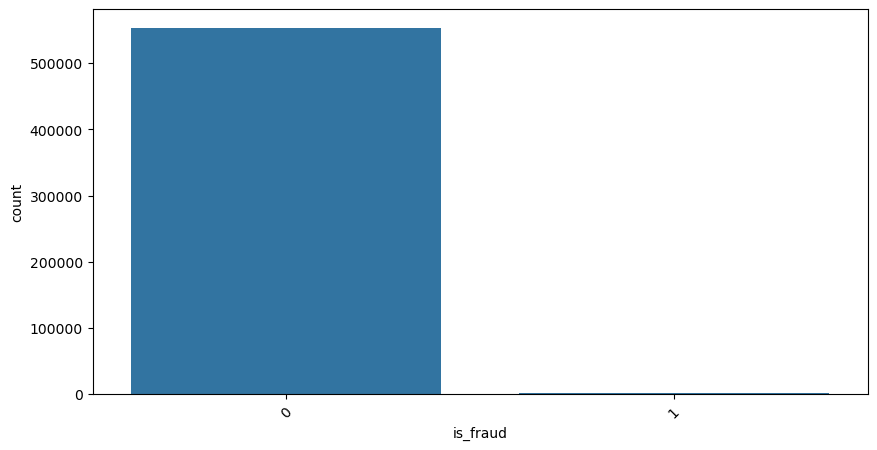

In [64]:
for i in cat_col:
    plt.figure(figsize=(10,5))
    sns.countplot(data=cust_df,x=i)
    plt.xticks(rotation=45)
    plt.show()

### Observation
### category - The majority of transactions fall under the gas_transport
### gender - Female cardholder are higher in number
### state - TX state has highest number of transcation
### is_fraud - Vast majority transactions are non fraudulent

In [80]:
cust_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


# Feature Engineering 

In [83]:
# Time based feature
cust_df['trans_year'] = cust_df['trans_date_trans_time'].dt.year
cust_df['trans_month'] = cust_df['trans_date_trans_time'].dt.month
cust_df['trans_date'] = cust_df['trans_date_trans_time'].dt.day
cust_df['trans_dayofweek'] = cust_df['trans_date_trans_time'].dt.dayofweek 
cust_df['trans_hour'] = cust_df['trans_date_trans_time'].dt.hour
cust_df['is_weekend'] = cust_df['trans_date_trans_time'].dt.dayofweek >= 5

In [87]:
cust_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_dayofweek,trans_hour,is_weekend,trans_date
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,1371816865,33.986391,-81.200714,0,2020,6,6,12,True,21
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,1371816873,39.450498,-109.960431,0,2020,6,6,12,True,21


In [90]:
cust_df['age']=(cust_df['trans_date_trans_time'] - cust_df['dob']).dt.days // 365

In [91]:
cust_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_dayofweek,trans_hour,is_weekend,trans_date,age
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.986391,-81.200714,0,2020,6,6,12,True,21,52
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,39.450498,-109.960431,0,2020,6,6,12,True,21,30


### Some time based features are added to get better insights

In [92]:
# 1. Average Transaction Amount by Category

In [93]:
cust_df[['category','amt']].groupby('category')\
.mean().sort_values(by='amt', ascending=False)


,amt
category,
grocery_pos,115.885327
travel,112.389683
shopping_net,83.481653
misc_net,78.600237
shopping_pos,76.862457
entertainment,63.984840
gas_transport,63.577001
misc_pos,62.182246
home,57.995413


In [94]:
# 2. Fraud Rate by Transaction Category

In [95]:
cust_df[['category', 'is_fraud']].groupby('category')\
.mean().sort_values(by='is_fraud', ascending=False)


,is_fraud
category,
shopping_net,0.012111
misc_net,0.009756
grocery_pos,0.009229
shopping_pos,0.004278
gas_transport,0.002732
travel,0.002292
grocery_net,0.002111
misc_pos,0.002082
personal_care,0.001780


In [96]:
# 3. Fraud Rate by Hour of Day

In [97]:
cust_df[['trans_hour', 'is_fraud']].groupby('trans_hour')\
.mean().sort_values(by='is_fraud', ascending=False)


,is_fraud
trans_hour,
22,0.019374
23,0.018682
3,0.010660
0,0.010356
2,0.009261
1,0.009154
20,0.001286
5,0.001116
18,0.001071


In [98]:
# 4. Average Amount of Fraud vs Non-Fraud

In [99]:
cust_df[['is_fraud', 'amt']].groupby('is_fraud')\
.mean().sort_values(by='amt', ascending=False)


,amt
is_fraud,
1,528.356494
0,67.614408


In [100]:
# 5. Fraud Rate by Age Group

In [103]:
 cust_df['Age Group']=pd.cut(cust_df['age'],bins=[18, 30, 45, 60, 80, 100], labels=['18-30', '31-45', '46-60', '61-80', '81-100'])

In [107]:
cust_df[['Age Group', 'is_fraud']].groupby('Age Group')\
.mean().sort_values(by='is_fraud', ascending=False)

C:\Users\Avita\AppData\Local\Temp\ipykernel_13972\1316810818.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_df[['Age Group', 'is_fraud']].groupby('Age Group')\


,is_fraud
Age Group,
61-80,0.005112
46-60,0.004074
81-100,0.003649
31-45,0.003490
18-30,0.003317


In [108]:
# 6. Fraud Count by State (Top 10 Fraud-Prone States)

In [109]:
cust_df[cust_df['is_fraud'] == 1][['state', 'is_fraud']]\
.groupby('state').count().sort_values(by='is_fraud', ascending=False).head(10)

,is_fraud
state,
NY,175
PA,114
TX,113
CA,76
IL,76
IN,75
VA,75
MN,73
MO,71


## Final Summary
### 1 **Transaction Amount by Category**
### On average, grocery_pos transactions involve the highest spending, followed closely by travel. This indicates that essential and high-value categories may carry more financial risk per transaction.
### 2 **Fraud Distribution by Category**
### The shopping_net category has the highest fraud rate, highlighting the vulnerability of online retail transactions to fraudulent activities.
### 3 **Fraud Patterns by Time of Day**
### Fraudulent transactions are more common during late night hours, especially around 10 PM to 12 AM, and in the early morning (e.g., 2–3 AM). This aligns with the idea that fraudsters often operate during off-peak hours to avoid detection.
### 4 **Transaction Amount vs Fraud**
### The average amount in fraudulent transactions is notably higher than in legitimate ones, suggesting that fraudsters often target higher-value opportunities
### 5 **Fraud by Age Group**
### Individuals aged 61–80 show the highest fraud rate, followed by the 46–60 group. This could point to higher vulnerability or less digital awareness among older customers.
### 6 **Geographic Fraud Insights**
### The state of New York (NY) records the highest number of fraudulent transactions, which may be influenced by its high population density and urban digital activity

# Machine Learning- Fraud Prediction 

In [111]:
# Fraud Prediction - Supervised Approach / Binary classification

In [113]:
cust_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,trans_year,trans_month,trans_dayofweek,trans_hour,is_weekend,trans_date,age,Age Group
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-81.200714,0,2020,6,6,12,True,21,52,46-60
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-109.960431,0,2020,6,6,12,True,21,30,18-30


In [116]:
cust_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_year', 'trans_month',
       'trans_dayofweek', 'trans_hour', 'is_weekend', 'trans_date', 'age',
       'Age Group'],
      dtype='object')

In [128]:
cust_df.drop(columns=['trans_date_trans_time' ,'cc_num' ,'first', 'last', 'street', 'city' ,'zip' ,'trans_num', 'unix_time' ,'merchant' ,'job' ,'dob' ,'age'],inplace=True)

### I removed some columns which have either too many unique values or do not help in prediction

## Label Encoding 

In [131]:
cust_df['Age Group']=cust_df['Age Group'].astype(object)

In [132]:
cust_df.dtypes

category            object
amt                float64
gender              object
state               object
lat                float64
long               float64
city_pop             int64
merch_lat          float64
merch_long         float64
is_fraud             int64
trans_year           int32
trans_month          int32
trans_dayofweek      int32
trans_hour           int32
is_weekend            bool
trans_date           int32
Age Group           object
dtype: object

In [134]:
cat_col=cust_df[['category','gender','state','Age Group']]

In [135]:
cat_col

,category,gender,state,Age Group
0,personal_care,M,SC,46-60
1,personal_care,F,UT,18-30
2,health_fitness,F,NY,46-60
3,misc_pos,M,FL,31-45
4,travel,M,MI,61-80
...,...,...,...,...
555714,health_fitness,M,MO,46-60
555715,kids_pets,M,TX,18-30
555716,kids_pets,F,WA,31-45
555717,travel,M,ID,46-60


In [136]:
for col in cat_col:
    le=LabelEncoder()
    cust_df[col]=le.fit_transform(cust_df[col])

In [137]:
cust_df.head(2)

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_dayofweek,trans_hour,is_weekend,trans_date,Age Group
0,10,2.86,1,39,33.9659,-80.9355,333497,33.986391,-81.200714,0,2020,6,6,12,True,21,2
1,10,29.84,0,43,40.3207,-110.4360,302,39.450498,-109.960431,0,2020,6,6,12,True,21,0


## SMOTE

In [115]:
cust_df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [138]:
# As we can see our data is highly unbalanced so lets apply SMOTE 

In [143]:
X=cust_df.drop('is_fraud',axis=1)

In [144]:
X

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,trans_year,trans_month,trans_dayofweek,trans_hour,is_weekend,trans_date,Age Group
0,10,2.86,1,39,33.9659,-80.9355,333497,33.986391,-81.200714,2020,6,6,12,True,21,2
1,10,29.84,0,43,40.3207,-110.4360,302,39.450498,-109.960431,2020,6,6,12,True,21,0
2,5,41.28,0,33,40.6729,-73.5365,34496,40.495810,-74.196111,2020,6,6,12,True,21,2
3,9,60.05,1,8,28.5697,-80.8191,54767,28.812398,-80.883061,2020,6,6,12,True,21,1
4,13,3.19,1,21,44.2529,-85.0170,1126,44.959148,-85.884734,2020,6,6,12,True,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,5,43.77,1,23,40.4931,-91.8912,519,39.946837,-91.333331,2020,12,3,23,False,31,2
555715,7,111.84,1,42,29.0393,-95.4401,28739,29.661049,-96.186633,2020,12,3,23,False,31,0
555716,7,86.88,0,46,46.1966,-118.9017,3684,46.658340,-119.715054,2020,12,3,23,False,31,1
555717,13,7.99,1,12,44.6255,-116.4493,129,44.470525,-117.080888,2020,12,3,23,False,31,2


In [145]:
Y=cust_df['is_fraud']

In [146]:
sm = SMOTE(sampling_strategy='minority')
X_new,Y_new=sm.fit_resample(X,Y)

In [147]:
print('Before SMOTE :',Y.value_counts())
print('After Smote :',Y_new.value_counts())

Before SMOTE : is_fraud
0    553574
1      2145
Name: count, dtype: int64
After Smote : is_fraud
0    553574
1    553574
Name: count, dtype: int64


### As our data (is_fraud column) was highly unbalanced so SMOTE was applied to oversample it.
### This helped the model learn better from minority class and improved attrition detection without losing original data

## Standardisation

In [148]:
ss=StandardScaler()
X_ft=ss.fit_transform(X_new)
X_ft=pd.DataFrame(X_ft)
X_ft.columns=X_new.columns

<Axes: >

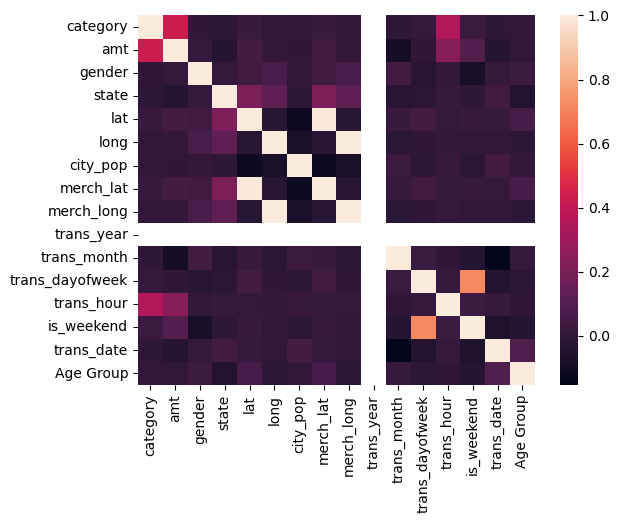

In [149]:
corr_mat=X_ft.corr()
sns.heatmap(corr_mat)

### No strong correlation observed

## Feature Selection

In [151]:
cust_df

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_dayofweek,trans_hour,is_weekend,trans_date,Age Group
0,10,2.86,1,39,33.9659,-80.9355,333497,33.986391,-81.200714,0,2020,6,6,12,True,21,2
1,10,29.84,0,43,40.3207,-110.4360,302,39.450498,-109.960431,0,2020,6,6,12,True,21,0
2,5,41.28,0,33,40.6729,-73.5365,34496,40.495810,-74.196111,0,2020,6,6,12,True,21,2
3,9,60.05,1,8,28.5697,-80.8191,54767,28.812398,-80.883061,0,2020,6,6,12,True,21,1
4,13,3.19,1,21,44.2529,-85.0170,1126,44.959148,-85.884734,0,2020,6,6,12,True,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,5,43.77,1,23,40.4931,-91.8912,519,39.946837,-91.333331,0,2020,12,3,23,False,31,2
555715,7,111.84,1,42,29.0393,-95.4401,28739,29.661049,-96.186633,0,2020,12,3,23,False,31,0
555716,7,86.88,0,46,46.1966,-118.9017,3684,46.658340,-119.715054,0,2020,12,3,23,False,31,1
555717,13,7.99,1,12,44.6255,-116.4493,129,44.470525,-117.080888,0,2020,12,3,23,False,31,2


In [152]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(X_new,Y_new)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [153]:
rfe_ranking = pd.DataFrame({'Features':X_new.columns, 'ranking':rfe.ranking_})
rfe_ranking.sort_values(by='ranking')

,Features,ranking
0,category,1
1,amt,1
2,gender,1
3,state,1
4,lat,1
5,long,1
6,city_pop,1
7,merch_lat,1
8,merch_long,1
10,trans_month,1


In [154]:
selected_features = rfe_ranking[rfe_ranking['ranking'] == 1]['Features'].tolist()

In [155]:
selected_features

['category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'trans_month',
 'trans_dayofweek',
 'trans_hour',
 'is_weekend',
 'trans_date',
 'Age Group']

### Feature selection was performed using Recursive Feature Elimination (RFE), which selects top 15 best subset features by training and ranking them with a machine learning model

## Train Test Data Split

In [157]:
X_new.shape

(1107148, 16)

In [158]:
X_train, X_test, y_train, y_test=train_test_split(X_new[selected_features],Y_new,test_size=0.2,random_state=44)

## Model Training 

In [159]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

C:\Users\Avita\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=1)

## Prediction 

In [160]:
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

## Model Evaluation 

In [161]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Logistic Regression Results:
Accuracy: 0.8432281082057536
Confusion Matrix:
 [[102623   7991]
 [ 26723  84093]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86    110614
           1       0.91      0.76      0.83    110816

    accuracy                           0.84    221430
   macro avg       0.85      0.84      0.84    221430
weighted avg       0.85      0.84      0.84    221430

Random Forest Results:
Accuracy: 0.9993316172153728
Confusion Matrix:
 [[110497    117]
 [    31 110785]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110614
           1       1.00      1.00      1.00    110816

    accuracy                           1.00    221430
   macro avg       1.00      1.00      1.00    221430
weighted avg       1.00      1.00      1.00    221430

